<a href="https://colab.research.google.com/github/GiuliaCN/MAC0417/blob/main/ep2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EP2.2 - MAC0417/5768 - Visão e Processamento de Imagens

Professor: Roberto Marcondes

Alunos:

*   Carlos Reis NºUSP 11295741
*   Daniel Silva Lopes da Costa N°USP 11302720
*   Giulia Cunha De Nardi N°10692203

Pasta no Drive: https://drive.google.com/drive/folders/1UCvz5sp8_lax59cgArrOyZSArcTVpvfI?usp=sharing


Github: https://github.com/GiuliaCN/MAC0417




**Objetivo:** Aumentar o conjunto de imagens por meio de transformações de frequência e de espaço. Também queremos anlisar os efeitos dessas traformações nas imagens, por meio de histogramas de imagens.

In [ ]:
# Conectar-se ao Drive
from google.colab import drive

# https://docs.python.org/3/library/os.html
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# skimage.io para carregar as imagens
# https://scikit-image.org/docs/dev/api/skimage.io.html
from skimage import io
from skimage import data, img_as_float
from skimage import exposure
from skimage.util import img_as_ubyte

# https://pandas.pydata.org/
import pandas as pd

from itertools import product

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/eps/')

### Nome das classes

In [ ]:
classes = os.listdir('datasets/originalDataset')
n=len(classes)
classe_a = classes[:n//3]
classe_b = classes[n//3 : 2*n//3] 
classe_c = classes[2*n//3:]
print(f'classes = {classes}')
print(f'a = {classe_a}')
print(f'b = {classe_b}')
print(f'c = {classe_c}')

classes = ['tesoura', 'lapis', 'chave', 'garfo', 'oculos', 'grampeador', 'copo', 'desodorante', 'escova', 'faca']
a = ['tesoura', 'lapis', 'chave']
b = ['garfo', 'oculos', 'grampeador']
c = ['copo', 'desodorante', 'escova', 'faca']


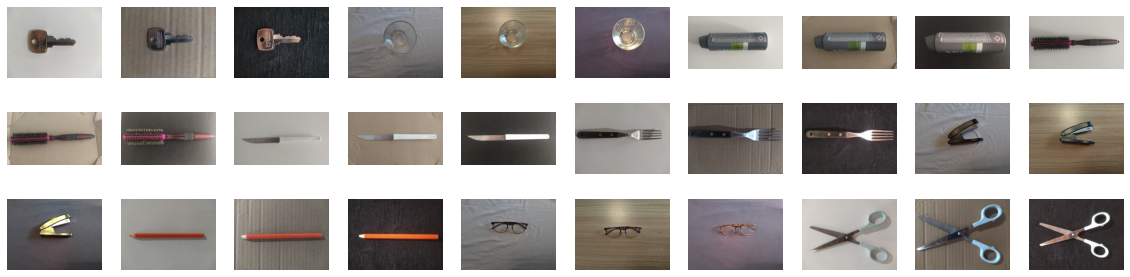

In [ ]:
imgs = io.imread_collection("datasets/originalDataset/*/*-1*di1.jpg") # coloque a sua ext
n_colunas, n_linhas = 10, 3

fig, axs = plt.subplots(3, 10, figsize=(20, 5))
num_fotos = n_colunas * n_linhas
for e, objeto in enumerate(imgs[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].imshow(objeto)
    axs[l, c].axis('off')
plt.show()

##EP2.2 - Normalização e análise da variação das classes

Nesse jupyter notebook as são geradas as imagens normalizadas de cada classe do augmentedDataSet (Criação dos Dataset Normalizados). Gerando um normalizedDataset.

Além disso é gerado uma imagem protótipo para cada classe do: originalGrayDataset, augmentedDataset e normalizedDataset (Protótipo médio de cada classe)

Apartir dos protótipos foi gerado um histograma médio e calculado a variância deste. (Histograma médio de cada classe & Variância)

<br>

Um ponto de atenção é que como a todo momento o drive é acessado, os processos dependem integralmente desse acesso e como há limite num acesso contínuo a ele, percebemos que muitas vezes, em execuções grandes acontecia erro que o acesso era interrompido, para mitigar isso as execuções foram separadas em chamadas menores (por exemplo, analisa-se um dataset de 3 em 3 classes para geração das imagens normalizadas).

Devido a isso recomendamos não "executar tudo", apenas as partes iniciais de importação e definição e das análises, evitando recriar as imagens que pode resultar nesse comportamento (retorna erro e é necessário executar mais vezes até que consiga executar sem perder a conexão como drive).


# Criação dos Dataset Normalizados

Normalização de imagens é um processo que modifica o intervalo dos valores das intensidades dos pixels tornando a imagem mais familiar (normal) aos sentidos. [1]

Na prática a normalização é uma técnica de realce de contraste modificando o intervalo de intensidades. Mais especificamente, passando esse intervalo para valores entre 0 e 1. [2]

Uma das formas de normalizar uma imagem é pela equalização do histograma que tenta aproximar a distribuição dos níveis de intensidade dos pixels para uma distribuição uniforme. [2]

<br>

[1] http://dev.ipol.im/~nmonzon/Normalization.pdf, Acessado em 27/06/21

[2] http://wiki.icmc.usp.br/images/5/5e/DIP_02_Realce_p1.pdf, Acessado em 27/06/21

## Função de criação de dataset normalizado

Função criada com base em 
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py

A função cria uma imagem usando equalização de histogramas. Por si só essa imagem gerada não é normatizada, entretanto a função "imsave" pode receber os parâmetros "vmin" e "vmax" que muda o colormap da imagem correspondendo ao intervalo dos valores recebidos, assim, ao passar vmin=0 e vmax=1 a imagem resultante é normalizada.

In [ ]:
def CreateNormalized (folder, Dataset, auxclasses):

  for k in range(len(auxclasses)):

    #print(f'Gerando imagens da pasta "{Dataset}" classe "{auxclasses[k]}"...')

    imgs = io.imread_collection("datasets/"+folder+Dataset+"/"+auxclasses[k]+"/*.jpg") # coloque a sua ext
    list_files = os.listdir("datasets/"+folder+Dataset+"/"+auxclasses[k])
    list_files.sort()
    i = 0
    # cria imagens normalizadas
    for imagem in imgs:
      try:
        # Equalization
        imagem = exposure.equalize_hist(imagem)
        
        # salva imagens
        imagem *= 255
        imagem = imagem.astype('uint8')
        io.imsave("datasets/normalizedDataset/"+Dataset+"/"+auxclasses[k]+"/"+list_files[i], imagem, vmin=0, vmax=1)
        i+=1
      except:
        print(f' >> problema em gerar imagem {list_files[i]}')
    #print(f'> Imagens da pasta "{Dataset}" da classe "{auxclasses[k]}" geradas com sucesso\n')

### Normalizados do ExpDataset

In [ ]:
CreateNormalized('augmentedDataset/','expDataset',classe_a)

In [ ]:
CreateNormalized('augmentedDataset/','expDataset',classe_b)

In [ ]:
CreateNormalized('augmentedDataset/','expDataset',classe_c)

### Normalizados do grayDataset

In [ ]:
CreateNormalized('augmentedDataset/','grayDataset',classe_a)

In [ ]:
CreateNormalized('augmentedDataset/','grayDataset',classe_b)

In [ ]:
CreateNormalized('augmentedDataset/','grayDataset',classe_c)

### Normalizados do logDataset

In [ ]:
CreateNormalized('augmentedDataset/','logDataset',classe_a)

In [ ]:
CreateNormalized('augmentedDataset/','logDataset',classe_b)

In [ ]:
CreateNormalized('augmentedDataset/','logDataset',classe_c)

### Normalizados do originalDataset

In [ ]:
CreateNormalized('augmentedDataset/','originalDataset',classe_a)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [ ]:
CreateNormalized('augmentedDataset/','originalDataset',classe_b)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [ ]:
CreateNormalized('augmentedDataset/','originalDataset',classe_c)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


### Normalizados do sumDataset

In [ ]:
CreateNormalized('augmentedDataset/','sumDataset',classe_a)

In [ ]:
CreateNormalized('augmentedDataset/','sumDataset',classe_b)

In [ ]:
CreateNormalized('augmentedDataset/','sumDataset',classe_c)

#Protótipo médio de cada classe

O protótipo médio foi gerado utilizando o cálculo de média pixel a pixel de todas as imagens de cada dataset.


In [ ]:
def get_mean_images(datasets, classes):
  '''
  Função que retorna o array 

  inputs: 
    datasets (dict): dicionário com o path dos datasets
    classes  (list): lista com o nome das classes
  output:
    mean_result (list): lista com as matrizes médias de cada produto dataset x classe    
  '''
  mean_result = []
  # Iterando no produto cartesiano de datasets e classes, totalizando 30 iterações
  for (dataset, classe) in product(datasets.keys(), classes):
    imgs = io.imread_collection("datasets/"+dataset+"/"+classe+"/*.jpg")

    soma = np.zeros(imgs[0].shape, dtype='float32')
    err_count = 0
    for img in imgs:
      try:
        soma += img / 255

      except ValueError:
        err_count += 1
    # fazendo a média
    soma = soma / (len(imgs) - err_count) 
    mean_result.append(soma)
  return mean_result


In [ ]:
# Chave: path do dataset no drive
# Valor: Nome do dataset para plotagem
datasets = {
    "originalGrayDataset"           : "Original",
    "normalizedDataset/grayDataset" : "Normalized",
    "augmentedDataset/grayDataset"  : "Augmented"
}

mean_imgs = get_mean_images(datasets, classes)

### Visualização das médias:

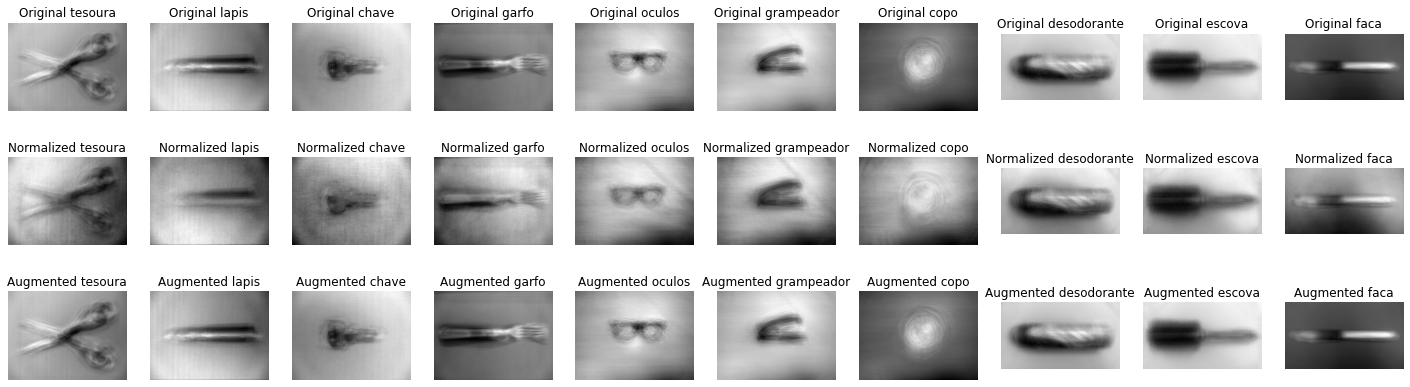

In [ ]:
def title_gen():
  '''
  Gerador que retorna um título cada vez que é chamado, utilizando o mesmo produto cartesiano da execução
  '''
  for (dataset, classe) in product(datasets.values(), classes):
    yield f"{dataset} {classe}"

# Instanciando o gerador
titles = title_gen()
n_colunas = 10
fig, axs = plt.subplots(3, 10, figsize=(25, 7))
for e, objeto in enumerate(mean_imgs):
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].set_title(next(titles))
    axs[l, c].imshow(objeto, cmap=plt.cm.gray)
    axs[l, c].axis('off')
plt.show()

#Histograma médio de cada classe & Variância

O histograma médio plota a ocorrência de determinada intensidade ao longo da imagem média gerada anteriormente.

A variância é feita para cada localização das 108 imagens do dataset e mostra o quanto a intensidade daquele determinado pixel varia em relação ao resto do dataset.

In [ ]:
variances_all = []
for (dataset, classe) in product(datasets.keys(), classes):
  imgs = io.imread_collection("datasets/"+dataset+"/"+classe+"/*.jpg")
  stack = []
  try:
    stack = np.dstack(list(imgs))
  except ValueError:
    pass
  variances_all.append([np.var(a, axis=-1) for a in stack])

array_variances = [np.array(img) for img in variances_all]
  

In [ ]:
def normalizer(image):
  return image/(image.max()/255.0) if image.any() else image

variances_normalized = [normalizer(image) for image in array_variances]

## Visualização do histograma médio e variância:


Para plotar o histograma junto com a variância, fizemos 2 gráficos em conjunto, em azul o histograma médio, em vermelho o histograma da variância. 

Ambos foram escalados no domínio de 0 a 255, reprsentando a intensidade do pixel.

Para os datasets da escova e da faca, não foi possível retirar a variância pois havia diferença de tamanho entre as imagens, demonstrando a importância de se ter datasets com imagens de tamanho igual.

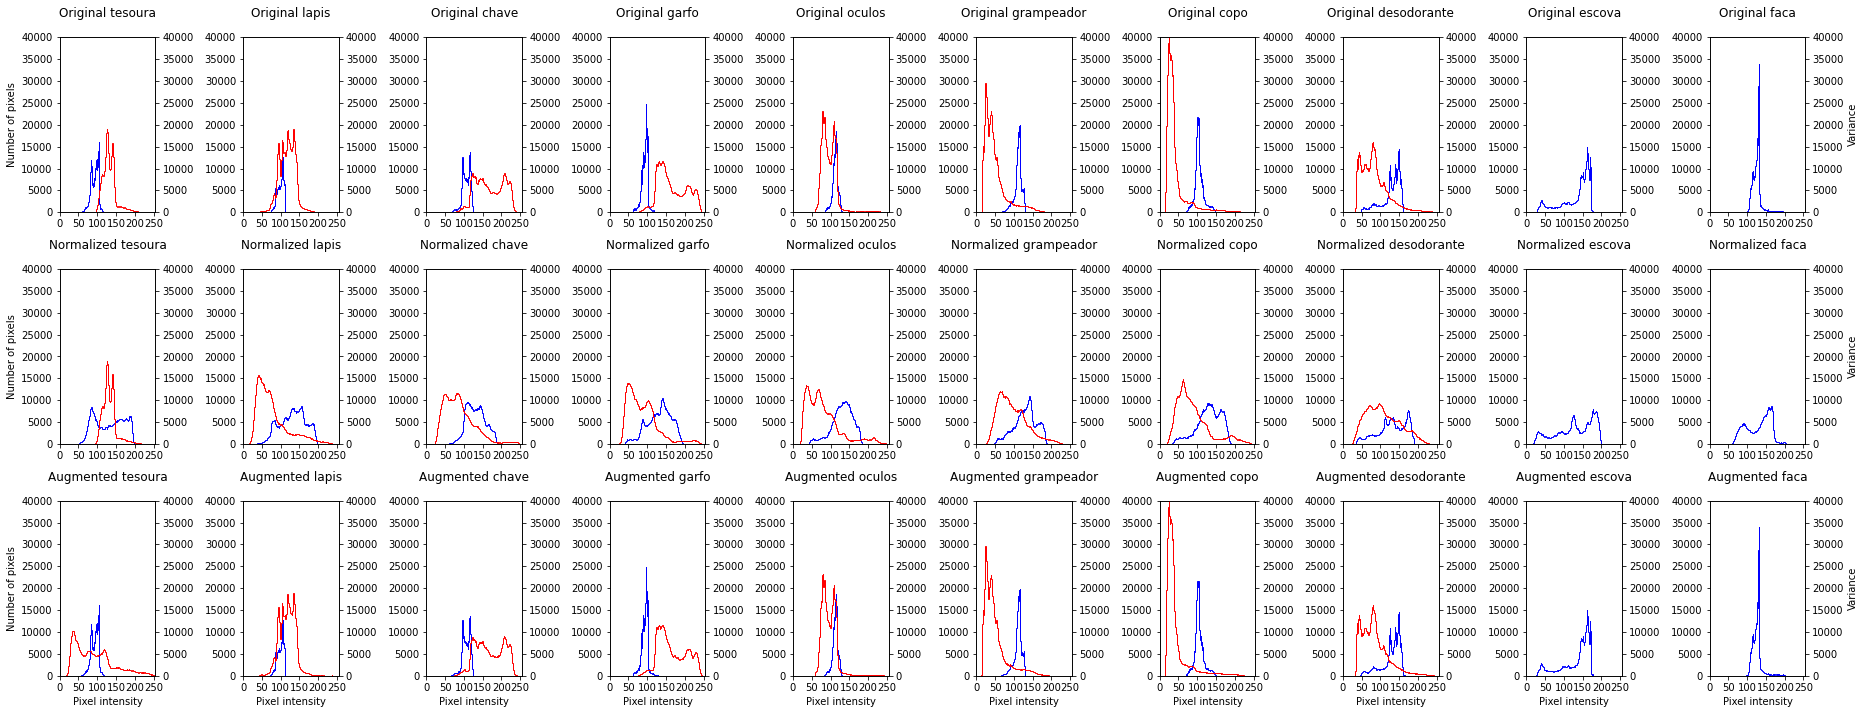

In [ ]:
bins=256
titles = title_gen()
fig, axs = plt.subplots(3, 10, figsize=(26, 10))
for e, objeto in enumerate(mean_imgs):
    objeto_scaled = (objeto*255).ravel()
 
    l, c = (e // n_colunas, e % n_colunas)
    axs[l, c].set_title(next(titles), y=1.08)
    axs[l, c].hist(objeto_scaled, bins=bins, histtype='step', color="blue")
    axs[l, c].set_ylim(0, 40000)
    axs[l, c].set_xlim(0, 255)
    axs[l, c].set_xticks(range(0, 256, 50))

    if c == 0: axs[l, c].set_ylabel('Number of pixels')
    if l == 2: axs[l, c].set_xlabel('Pixel intensity')

    ax_cdf = axs[l, c].twinx()
    ax_cdf.hist((variances_normalized[e-1]).ravel(), bins=bins, histtype='step', color="red")
    ax_cdf.set_ylim(0, 40000)
    if c == 9: ax_cdf.set_ylabel('Variance')

plt.tight_layout()
plt.show()